# Solving Algebraic Equations

These exercises reinforce skills in the numerical solution of algebraic equations. If you want to learn about these topics in more detail, please reference Python Supplements 08 - 13.

## Topics Covered

1. Scipy package; `scipy.optimize`
2. Solution of algebraic equations with `optimize` or `optimize.root_scalar` (root finding for univariate functions).
3. Solving systems of nonlinear algebraic equations with `optimize.root` (multivariate root finding).
4. The importance of initial guesses; strategies for providing good initial guesses to Equations solvers.
5. Graphing in 2D and 3D to visualize root locations.

## Problem 01

Solve the following algebraic equation for the smallest positive root:

$$x^3 - 10x + e^{-0.25x} = 35.75$$

### Solution to Problem 01

As we've discussed, if it is easy for me to graph a function, I usually do so because I need a good initial guess of the root location when I use numerical methods.  Graphing makes it very easy to see where the roots are.

I'll plot this below by creating a **lambda** function.  I am using a lambda function because this is a very simple expression.  Specifically, I am going to create a function of the form:

$$f(x) = x^3 - 10x + \exp{(-0.25x)} - 35.75$$

Why do I write it that way?  Because I want to figure out where the function, $f(x)$, equals zero.  So in that form, I can graph the function and look for any places where $f(x)$ crosses the x axis.  Those are the places where f(x) = 0.

In [1]:
#Import packages we'll need as we go
import numpy as np
import matplotlib.pyplot as plt

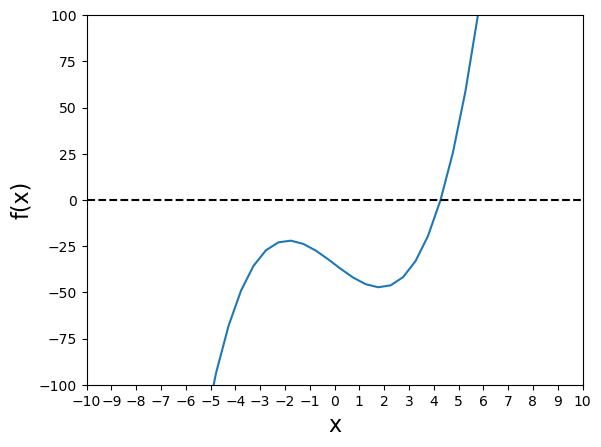

In [2]:
#creating the function with lambda syntax
p1 = lambda x: x**3 - 10*x + np.exp(-0.25*x) - 35.75

#I'll plot it from x = -50 to x = 50; create the set of x values as np.array using linspace.
xspan = np.linspace(-50, 50, 200)

#plot the function value for every value in xspan.
plt.plot(xspan, p1(xspan))

#Add a horizontal line at y = 0 that goes from x = -50 to x =50; use a black, dashed line
plt.hlines(0, -50, 50, linestyle = 'dashed', color = 'black')

# #Set limits on x axis
plt.xlim(-10, 10)

#Set ticks on x axis
# plt.xticks(range(-50, 51, 10))
plt.xticks(range(-10, 11, 1))

#Set label on x axis
plt.xlabel('x', fontsize = 16)

#Set limits on y-axis
plt.ylim(-100, 100)

# #Set label on y axis
plt.ylabel('f(x)', fontsize = 16)

# # #Display current figure
plt.show()

We can see clearly that it crosses the x-axis in two places (this remains true even if we zoom out much further).  There is a root at about -45 and another at about 5.  We want the "smallest positive root" according to the problem statement, so we want to look around x = 5 for a root.

We'll do this with a numerical method, specifically, we'll use one of the equations solvers for univariate functions in `scipy.optimize`

`opt.newton` is usually a fine choice for univariate functions (functions that only take a single argument).  We give it a function that takes a single argument and returns a single value, in this case $p1(x)$, which returns the value of the above $f(x)$ function for a given value of x.

The iterative solver in `opt.newton` will start at our initial guess and continue making iterations on the value of x until $p1(x) \approx 0$ within our tolerance, which is usually $10^{-8}$ by default.

This solver is in the `scipy.optimize` package, which we'll alias below as "opt"

In [3]:
# import scipy.optimize as opt
# sol1 = opt.newton(p1, 4) #opt.newton needs our function name and an initial guess.
# print(sol1)
# print(p1(sol1))

#For a more complete picture of the solution, uncomment code below.
# sol1, info = opt.newton(p1, 4, full_output = True)
# print('', sol1, '\n', info.converged, '\n', p1(info.root), '\n', info.flag)

## Problem 2

Find all roots for the following system of equations. Both x and y must be between -10 and 10:

\begin{align}
     10 &= 5x^2y - y^3\\
    -(15y+x) &= 2y^2 + \textrm{tanh}(0.075x)\\
\end{align}

### Solution to Problem 02

This is a system of nonlinear equations, and even adding a second equation, we see that things get more complicated.  We do not have a solution until we find the (x,y) pairs where both of the equations are solved.  We are essentially looking for the roots of the following two functions with this problem:

\begin{align}
    f_1(x, y) &= 5x^2y - y^3 - 10 \\
    f_2(x, y) &= 2y^2 + \tanh{(0.075x)} + 15y + x\\
\end{align}

We have solved our problem when we find the values $\hat{x}$ and $\hat{y}$ that give the following result:

\begin{align}
    f_1(\hat{x}, \hat{y}) &= 0 \\
    f_2(\hat{x}, \hat{y}) &= 0 \\
\end{align}

I would love to be able to assess the problem graphically because that helps me to see axis crossings, but here, we have to work in 3-dimensions.  For every (x,y) pair that we give to each function, it will return a "z" value...so this is harder to visualize.  Both functions are surfaces, not lines.

But, let's give it a try and see what we can come up with.  This is definitely **not** an essential step in solving this problem, but it serves a few purposes:

1. It gives us extra practice with graphing
2. It illustrates visually what root finding for systems of equations entails

First, let's create two functions that take (x,y) argument pairs and return the values of $f_1(x,y)$ and $f_2(x,y)$.  We can again use `lambda` syntax here because these are easy one-liners.

In [4]:
# f1 = lambda x,y: 5*x**2*y - y**3 - 10
# f2 = lambda x,y: 2*y**2 + np.tanh(0.075*x) + 15*y + x

#### Surface Plots

We have to visualize these functions in 3D, so our options are surface plots ("actual" 3D illustration) or contour plots (a 2D representation of a 3D surface using contour lines).  Let's start with the surfaces.

In [5]:
# x = np.linspace(-10,10,50)
# y = np.linspace(-10,10,50)
# [X, Y] = np.meshgrid(x,y)

# Z1 = f1(X,Y) #values of the left-hand side of f1 for all X,Y pairs
# Z2 = f2(X,Y) #values of the left-hand side of f2 for all X,Y pairs.

# fig1, ax1 = plt.subplots(subplot_kw={"projection": "3d"})
# ax1.plot_surface(X, Y, Z1)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('f1(x,y)')

# fig2, ax2 = plt.subplots(subplot_kw={"projection": "3d"})
# ax2.plot_surface(X, Y, Z2)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('f2(x,y)')

So, that's fine?  I guess?  It doesn't really help me much, though.  What I need to find are the places where *both* surfaces intersect at values of zero, and that is almost impossible to determine from these 3D projections.

#### Overlaid Surface Plots

Maybe we can try to plot two surfaces on the same plot?

In [6]:
# fig1, ax1 = plt.subplots(subplot_kw={"projection": "3d"})
# ax1.plot_surface(X, Y, Z1)
# ax1.plot_surface(X, Y, Z2)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('f1 and f2')

Nope.  Not helpful.  I cannot really pin down any of locations of the roots using this.  Maybe contour plots?

#### Contour Plots

In [7]:
# plt.figure()
# plt.contour(X, Y, Z1, levels = 50) #note, levels = scalar tells us how many contour lines to use.
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.colorbar()
# plt.show()

# plt.figure()
# plt.contour(X, Y, Z2, levels = 50)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.colorbar()
# plt.show()

Actually, this gives me a much clearer view of where the functions are near zero.  From the first plot, we can see that $f_1(x,y)$ is close to zero toward the center of the plot, and then as we move to large X and Y values, we see that the function gets either very positive or very negative.  In the second case, we see that $f_2(x,y)$ is close to zero over a fairly broad space between y = 3 and -7 or so...and x = -10 to 10.  

#### Overlay Contour Plots

If we put the above onto a single plot, it is a mess:

In [8]:
# plt.figure()
# plt.contour(X, Y, Z1, levels = 50) #note, levels = scalar tells us how many contour lines to use.
# plt.contour(X, Y, Z2, levels = 50)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.colorbar()
# plt.show()

#### Adjusting Controur Plot Options

It is very difficult to interpret this figure.  There is too much going on, and I can't identify where the intersections are where both $f_1(x,y)$ and $f_2(x,y)$ are near zero.  However, we can also use the level keyword argument to specify a range of contour lines...sort of like applying limits to the z axis.  I can also set the colors of contour lines to various things. Here, I'll show the contour lines for the first function in red and the second function in blue.  We will also only show the contours between -0.01 and 0.01 because these will bound any areas where the functions are zero pretty well.  With this, we can see clearly where both functions are zero(ish)--this is indicated by the lines on the contour plot below.  

**This is showing us where the two surfaces intersect at values of 0**

In [9]:
# plt.figure()
# plt.contour(X, Y, Z1, levels = [-0.01, 0.01], colors = 'red')  #function 1 in red
# plt.contour(X, Y, Z2, levels = [-0.01, 0.01], colors = 'blue') #function 2 in blue
# plt.colorbar()
# plt.show()

Now that makes it very clear that I have 3 roots on the domain (X, Y) = [-10, 10]  Specifically, they are somewhere around:

1. (-3, -8)
2. (3, -8)
3. (-3, 0)

Now that I know this, I have a pretty good idea of initial guesses to make for x and y with my iterative solver routine.

#### Solving with scipy.optimize.root

For a system of nonlinear equations, we can't use `opt.newton` -- It only works on a univariate function.  Here, we need to solve functions that have two arguments, x and y. We'll need to use `opt.root` instead. This is a place where Python is picky about syntax.  We have to construct a function that models our system of equations...two rules:

1. That function takes a single argument that contains all of the unknowns in a collection (array)
2. That function must return the value of both of the equations we're solving ($f_1(x,y)$ and $f_2(x,y)$) for a given (x,y) pair.

Here, the problem is complicated enough that lambda functions lose their charm.  We'll specify with a general function definition.

In [10]:
# def P2(var):
#     x = var[0]
#     y = var[1]
#     #print([x, y])
#     LHS1 = 10 - 5*x**2*y + y**3  #this is function 1, solution at LHS1 = 0
#     LHS2 = 2*y**2 + np.tanh(0.075*x) + 15*y + x  #this is function 2, solution at LHS2 = 0
#     return np.array([LHS1, LHS2]) #return the value of f1 and f2 at current (x,y) values.

Once we have that function defined in that particular format, then we can use `opt.root` to solve it.  All it needs from us is the function name and an initial guess at the solution.  We have some pretty good ideas from the contour plot.  

`opt.root` will return a "solution structure" that has a ton of information in it.  I'll call this "ans" below, and we'll print the important fields from that solution:

1. The solution (ans.x); this is our "answer to the problem"
2. The function value at the solution (ans.fun); array of function values at solution; should all be zeros.
3. The message that tells us whether the solver converged or not (ans.message)

In [11]:
# var0 = np.array([-3, -7])
# ans  = opt.root(P2, var0)
# print(ans)
# print('', ans.x, '\n', ans.fun, '\n', P2(ans.x), '\n', ans.message)

## Problem 3

Solve the following system of nonlinear equations:

\begin{align}
    0 &= x^2 - 10x - 25y + 17z^2\\
    18.3 &= xz + \textrm{ln}(yz)\\
    145 - y^2 &= x^2 + 5z\\
\end{align}

### Solution 

Once you get the hang of formatting equations so that they are compatible with `opt.root`, this is straightforward.  See below, and compare it to above. Think about how logically similar the two code cells are.  This one is a little bigger and a little more complex because I have 3 variables and 3 functions, but otherwise, everything is identical.  This is a super easy concept to generalize, and I can solve any number of equations in this way using `opt.root`!!

In [12]:
# def P3(var):
#     x = var[0]
#     y = var[1]
#     z = var[2]
#     LHS1 = x**2 - 10*x - 25*y + 17*z**2
#     LHS2 = x*z + np.log(y*z) - 18.3
#     LHS3 = x**2 + 5*z + y**2 - 145
#     return np.array([LHS1, LHS2, LHS3])

# var0 = np.array([5, 5, 5])
# sol = opt.root(P3, var0)
# print('', sol.x, '\n', sol.fun, '\n', P2(sol.x), '\n', sol.message)

#### Stability of Nonlinear Equation Solvers in Problem 03

Although tools like `opt.newton` and `opt.root` are very easy to use, numerical solution of algebraic equations can be very tricky.  As a rule of thumb, the more equations that you are solving, and the more nonlinear these equations are, the more challening the numerical solution will be.  Usually, you need good-to-great initial guesses in order to solve difficult systems on nonlinear equations with numerical tools. 

Below, we demonstrate how certain initial guesses would cause the solver to go off the rails.  This problem is hard because visualizing it would require us to work in 4 dimensions since we have f1(x, y, z), etc.  So providing good initial guesses can be tricky.

In a physical system, we usually have limits on the variables that I can use to provide a better guess.  For example, fractional conversions and mole fractions are between 0 and 1; absolute temperatures can't be less than zero; a temperature of 8000C is unrealistic in a chemical process; a pressure of 50000000 atm is unrealistic in a chemical process, etc.

Here, it's just a math problem, so we have no idea how to bound x, y, and z without putting in a bit of effort (not a topic for this course).

Anyway, we can show that an initial guess of:

    var0 = [5, -5, -5]

Will cause the solver to issue a warning since it ends up passing a negative value to the logarithm in the second equation, which is undefined (notice that it still converges, though.  It gets around the nan ("not a number") error here).  Astute readers will point out that -5*-5 = 25, so the negative signs should cancel, allowing us to evaluate the natural logarithm.  This is true at the start, but, remember, these are iterative processes.  We make initial guesses, and those guesses bias our solutions.  Just because the solver starts out with x and y both negative (and with a positive product), it won't necessarily stay here.  We demonstrate this in the cell below.  You can see that it hits places where only one of the two is negative; hence the error.

In [13]:
# def P4(var):
#     x = var[0]
#     y = var[1]
#     z = var[2]
#     #print(f'current values in iteration are x = {x}, y = {y}, z = {z}')
#     LHS1 = x**2 - 10*x - 25*y + 17*z**2
#     LHS2 = x*z + np.log(y*z) - 18.3
#     LHS3 = x**2 + 5*z + y**2 - 145
#     return np.array([LHS1, LHS2, LHS3])

# var0 = np.array([5, -5, -5])
# sol = opt.root(P4, var0)
# print('', sol.x, '\n', sol.fun, '\n', P4(sol.x), '\n', sol.message)